## Imports

In [4]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/irtimid/Documents/travail/programmes/le2m-v2.1/le2m/extractor/")
import extractor

In [19]:
treatmentcodes = {0: "WITHOUT_ICONS", 1: "WITH_ICONS"}

## Parts in the database

In [5]:
datafile = sqlite3.connect("data.sqlite")
parts = extractor.get_parts(datafile)
parts

[u'sessions',
 u'parties',
 u'joueurs',
 u'partie_questionnaireFinal',
 u'partie_PublicGoodGameGender',
 u'partie_base',
 u'parties_joueurs__joueurs_parties',
 u'partie_PublicGoodGameGender_repetitions']

## The data

In [6]:
data = extractor.get_partdata(datafile, "partie_PublicGoodGameGender_repetitions")
data.head()

,session,joueur,id,partie_partie_id,PGGG_period,PGGG_treatment,PGGG_group,PGGG_grouptype,PGGG_indiv,PGGG_public,PGGG_publicgroup,PGGG_decisiontime,PGGG_indivpayoff,PGGG_publicpayoff,PGGG_periodpayoff,PGGG_cumulativepayoff
0,201512041558,201512041558_j_10,307,137,1,0,201512041558_g_1,1,6,14,37,0,6,18.5,24.5,24.5
1,201512041558,201512041558_j_10,327,137,2,0,201512041558_g_1,1,17,3,54,0,17,27.0,44.0,68.5
2,201512041558,201512041558_j_10,347,137,3,0,201512041558_g_1,1,10,10,51,0,10,25.5,35.5,104.0
3,201512041558,201512041558_j_10,367,137,4,0,201512041558_g_1,1,9,11,26,0,9,13.0,22.0,126.0
4,201512041558,201512041558_j_10,387,137,5,0,201512041558_g_1,1,19,1,28,0,19,14.0,33.0,159.0


## Averages by grouptype

In [8]:
datagroup = data.groupby([data.PGGG_treatment, data.PGGG_grouptype]).mean()
datagroup["PGGG_public"]

PGGG_treatment  PGGG_grouptype
0               0                 11.250
                1                 10.425
                2                 10.425
                3                  9.100
                4                 10.400
1               0                  8.975
                1                  9.300
                2                 11.275
                3                  8.425
                4                 10.875
Name: PGGG_public, dtype: float64

## Evolution over time

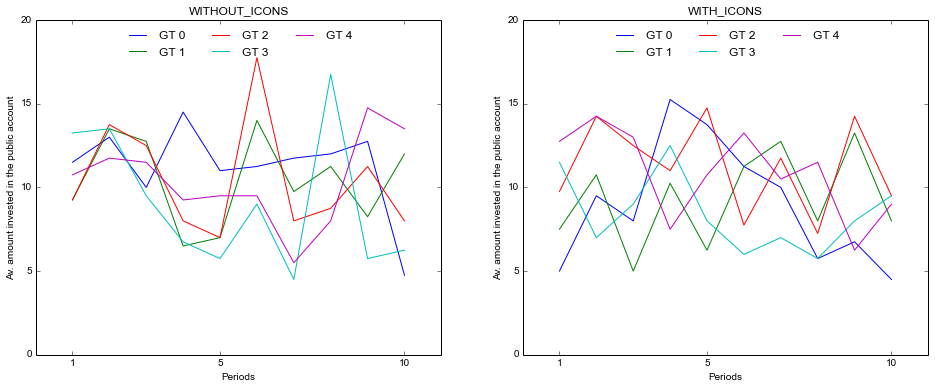

In [21]:
datagroupevol = data.groupby([data.PGGG_treatment, data.PGGG_grouptype, data.PGGG_period]).mean()
treatments, grouptypes, periods = datagroupevol.index.levels
fig = plt.figure(figsize=(16, 6))
for c, t in enumerate(treatments):
    graph = fig.add_subplot(1, 2, c+1)
    graph.set_xlim(0, 11)
    graph.set_xticks([1, 5, 10])
    graph.set_xlabel("Periods")
    graph.set_ylim(0, 20)
    graph.set_ylabel("Av. amount invested in the public account")
    graph.set_title(treatmentcodes[c])
    for g in grouptypes:
        temp = datagroupevol.loc[t].loc[g]["PGGG_public"]
        graph.plot(periods, temp, label="GT {}".format(g))
    graph.legend(loc=9, ncol=3, frameon=False)

## Dispersion of individual average contribution depending on the group type

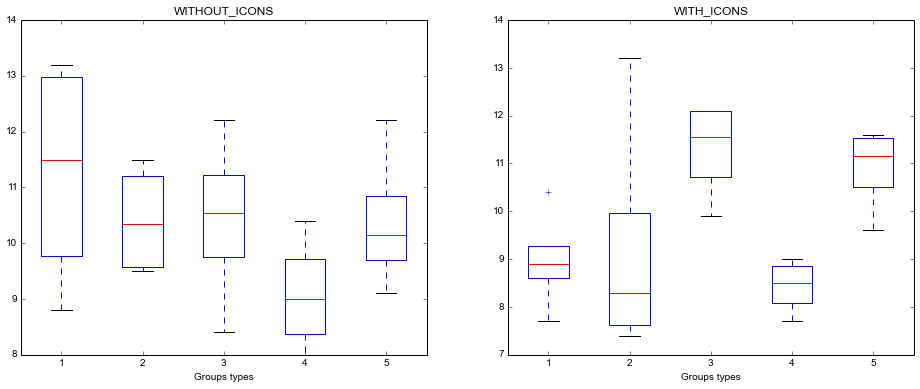

In [22]:
avplayer = data.groupby([data.PGGG_treatment, data.PGGG_grouptype, data.joueur]).mean()
treatments, grouptypes, players = avplayer.index.levels
fig = plt.figure(figsize=(16, 6))
for c, t in enumerate(treatments):
    graph = fig.add_subplot(1, 2, c+1)
    temp = [avplayer.loc[t].loc[g]["PGGG_public"] for g in grouptypes]
    graph.boxplot(temp)
    graph.set_title(treatmentcodes[c])
    graph.set_xlabel("Groups types")

## Effectives of each choice depending on the group type

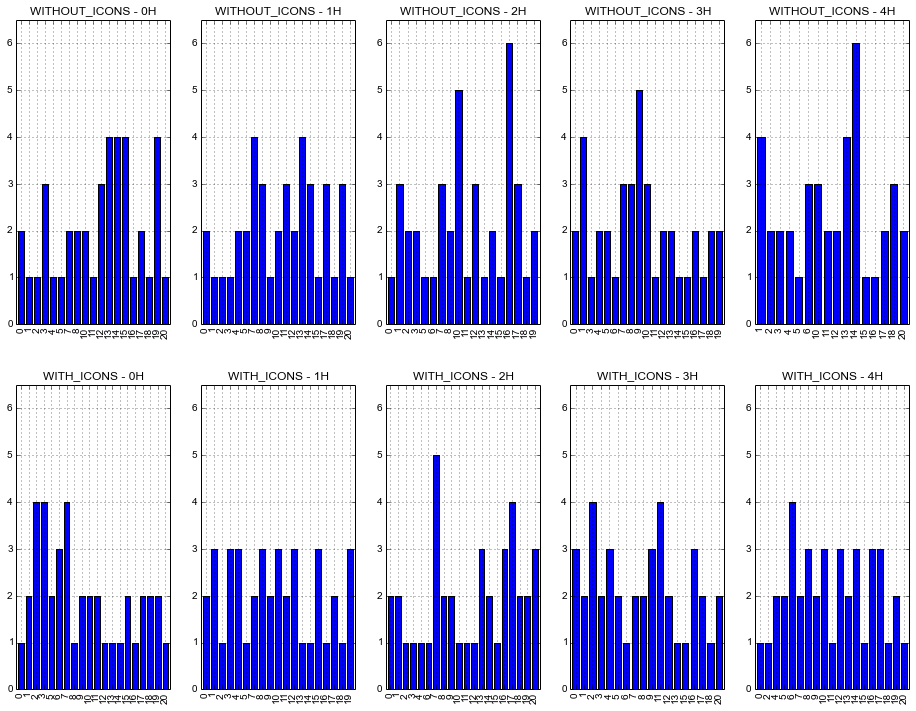

In [41]:
datafreq = data.groupby([data.PGGG_treatment, data.PGGG_grouptype])["PGGG_public"].value_counts(sort=False)
datafreq = pd.DataFrame(datafreq)
treatments, grouptypes, amounts = datafreq.index.levels
fig = plt.figure(figsize=(16,12))
for t, T in enumerate(treatments):
    Ttemp = datafreq.loc[T]
    for g, G in enumerate(grouptypes):
        graph = fig.add_subplot(2, 5, t*5 + g+1)
        Gtemp = Ttemp.loc[g]
        Gtemp.plot(kind="bar", ax=graph)
        graph.set_ylim(0, 6.5)
        graph.set_title(treatmentcodes[t] + " - " + str(G) + "H")
        graph.legend().set_visible(False)